# Code the de-noising example on page 81 in Julia.  

**Recommend:** use FFTW.jl, but there are other options.

In [1]:
import Pkg
Pkg.activate(".")

  Activating new project at `~/BME574/BME574_HW`


In [2]:
# add relevant packages
Pkg.add(["Random","LinearAlgebra","FFTW","Plots"]) 

   Resolving package versions...
   Installed SimpleBufferStream ─ v1.2.0
   Installed OpenSSL_jll ──────── v3.0.15+1
    Updating `~/BME574/BME574_HW/Project.toml`
  [7a1cc6ca] + FFTW v1.8.0
  [91a5bcdd] + Plots v1.40.8
  [37e2e46d] + LinearAlgebra
  [9a3f8284] + Random
    Updating `~/BME574/BME574_HW/Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [d1d4a3ce] + BitFlags v0.1.9
  [944b1d66] + CodecZlib v0.7.6
  [35d6a980] + ColorSchemes v3.26.0
  [3da002f7] + ColorTypes v0.11.5
  [c3611d14] + ColorVectorSpace v0.10.0
  [5ae59095] + Colors v0.12.11
  [34da2185] + Compat v4.16.0
  [f0e56b4a] + ConcurrentUtilities v2.4.2
  [d38c429a] + Contour v0.6.3
  [9a962f9c] + DataAPI v1.16.0
  [864edb3b] + DataStructures v0.18.20
  [8bb1440f] + DelimitedFiles v1.9.1
  [ffbed154] + DocStringExtensions v0.9.3
  [460bff9d] + ExceptionUnwrapping v0.1.10
  [c87230d0] + FFMPEG v0.4.1
  [7a1cc6ca] + FFTW v1.8.0
  [53c48c17] + FixedPointNumbers v0.8.5
  [1fa38f19] + Format v1.3.7
  [28b8d3ca] + GR v0.7

In [232]:
# bring these libraries' functions into the name space
using FFTW, Plots

In [233]:
# generate a set of t values over which to calculate our signal

# set the increment between t values
dt = 0.001

# create a set of t values between 0 and 1, increment by dt
t = 0:dt:1

# Calculate the number of values in t
n = length(t)

1001

Define a signal function f as the sum of two frequencies

$f(t) = sin(2\pi*50*t) + sin(2\pi*120*t)$

In [234]:
# frequency 1: 50, frequency 2: 120
f = sin.((2*π*50) .* t) + sin.((2*π*120) .* t)

# add noise to the original signal
f_n = f + 2.5 .* randn(n)

# Create the Fast Fourier transform--------------------------------------//

# perform FFT and find power spectrum
fhat = fft(f_n)
PSD = fhat .* conj(fhat)/n

# create a frequency axis
freq = (1 /(dt*n)) .* (0:n)

# Get indices to be used when graphing frequencies
L = 1:Int64(floor(n/2))

1:500

In [235]:
# isolate the locations of frequencies which have high power
idx = []
PSD_r = real.(PSD)
for i in enumerate(PSD_r)
    if i[2]>100
        append!(idx,i[1])
    end
end

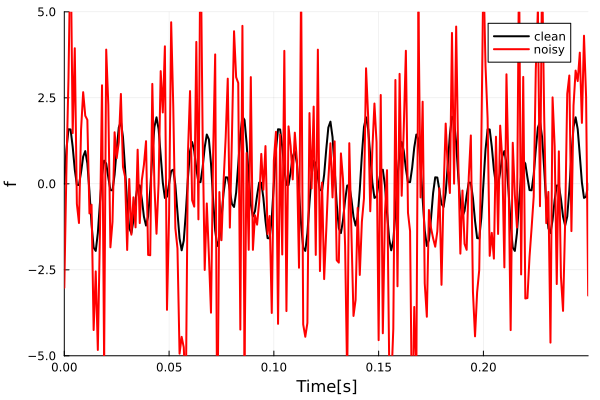

In [236]:
# zero out all values below the established trhreshold. 
PSD_clean  = zeros(Complex{Float64}, n) # initialize to right size, and allow to hold complex numbers
PSD_clean[idx].= PSD[idx] # assign the values that met the theshold

fhat_filt = zeros(Complex{Float64}, n)  # initialize to right size, and allow to hold complex numbers
fhat_filt[idx].=fhat[idx] # assign the values that met the theshold

# convert back to time domain to show effect of filtering
f_filt = ifft(fhat_filt)


# plot f vs t for original signal and noisy signal
plot(t,f,linewidth = 2, label="clean",lc = :black,legend=:topright)
plot!(t,f_n,linewidth = 2, label="noisy",lc = :red)
xlims!(0,0.25)
ylims!(-5,5)
xlabel!("Time[s]")
ylabel!("f")

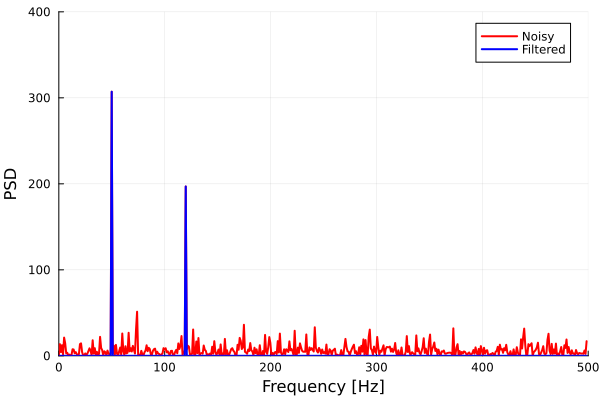

In [237]:
# plot PSD for both the noisty and filtered data
plot(freq[L],real.(PSD[L]),linewidth = 2, label="Noisy",lc = :red,legend=:topright)
plot!(freq[L],real.(PSD_clean[L]),linewidth = 2, label="Filtered",lc = :blue)
xlims!(0,500)
ylims!(0,400)
xlabel!("Frequency [Hz]")
ylabel!("PSD")

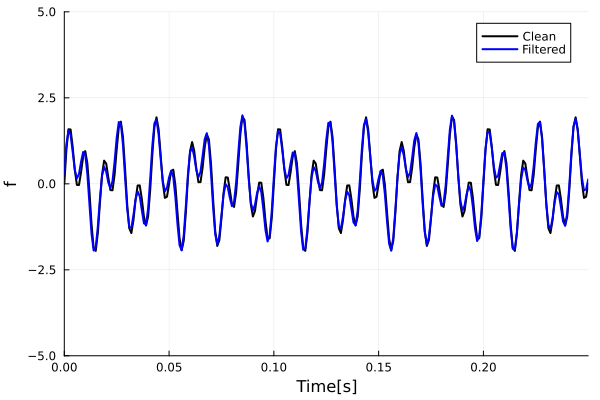

In [238]:
# plot the orignal signal (before noise) against the filtered data to show the effectiveness of the filter
plot(t,f,linewidth = 2, label="Clean",lc = :black,legend=:topright)
plot!(t,real.(f_filt),linewidth = 2, label="Filtered",lc = :blue)
xlims!(0,0.25)
ylims!(-5,5)
xlabel!("Time[s]")
ylabel!("f")